# Libraries

In [214]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import joblib

# Loading Data

In [194]:
# Reading the dataset
df = pd.read_csv("DataSampled.csv")  # Replace "your_dataset.csv" with the actual filename

# Printing the first few rows of the dataset
print(df.head())

df.columns = df.columns.str.strip()
# Drop the 'STAR' variable
df.drop(columns=['STAR'], inplace=True)

   MMSE  Age  Weight   Height   Waist     Hip  Smoking  Smoking (packet/year)  \
0   NaN   64     66.0    155.0    89.0  104.0      0.0                      0   
1   NaN   53     55.0    150.0    77.0   97.0      0.0                      0   
2  24.0   56     56.0    150.0   112.0  125.0      0.0                      0   
3   NaN   58     75.0    160.0   113.0    NaN      0.0                      0   
4  30.0   55     72.0    157.0    98.0  104.0      1.0                      4   

    Alcohol  DM   ...  Exercise  LowCST   CST  Gait speed  Low grip strength  \
0         0    0  ...         0     0.0   8.1        1.28                0.0   
1         0    0  ...       NaN     0.0   8.0        1.47                1.0   
2         0    0  ...         0     0.0  11.7        0.80                0.0   
3         0    1  ...         0     1.0  18.0        1.34                0.0   
4         0    0  ...  1-2/week     NaN  10.9        1.09                NaN   

  Grip strength  SARCOPENIA  STA

In [195]:
# Printing the information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MMSE                   812 non-null    float64
 1   Age                    1303 non-null   int64  
 2   Weight                 1302 non-null   float64
 3   Height                 1301 non-null   float64
 4   Waist                  1297 non-null   float64
 5   Hip                    1296 non-null   float64
 6   Smoking                1302 non-null   float64
 7   Smoking (packet/year)  1301 non-null   object 
 8   Alcohol                1303 non-null   object 
 9   DM                     1303 non-null   int64  
 10  DM duration            1289 non-null   float64
 11  İnsülin                1297 non-null   float64
 12  DM drug                379 non-null    object 
 13  Hiperlipidemi          1301 non-null   float64
 14  Dyslipidemia duration  1287 non-null   float64
 15  Dysl

In [196]:
# Printing the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (1303, 38)


In [197]:
# Print data types of all columns
print(df.dtypes)


MMSE                     float64
Age                        int64
Weight                   float64
Height                   float64
Waist                    float64
Hip                      float64
Smoking                  float64
Smoking (packet/year)     object
Alcohol                   object
DM                         int64
DM duration              float64
İnsülin                  float64
DM drug                   object
Hiperlipidemi            float64
Dyslipidemia duration    float64
Dyslipidemia drugs        object
KAH                      float64
KAH duration             float64
Hipotiroidi              float64
ASTIM                    float64
KOAH                     float64
OP                       float64
Other(s)                  object
HT                         int64
Anti-HT drug type         object
HT duration              float64
Education                 object
Occupation                object
Working Status            object
Exercise                  object
LowCST    

# Data Cleaning

In [198]:
# Convert categorical columns to categorical data type
categorical_cols = ['Smoking (packet/year)', 'Alcohol', 'DM drug', 'Dyslipidemia drugs', 'Other(s)', 'Anti-HT drug type', 'Education', 'Occupation', 'Working Status', 'Exercise', 'Gender']
df[categorical_cols] = df[categorical_cols].astype('category')

# Check for missing values in categorical columns
missing_categorical = df[categorical_cols].isnull().sum()
print("Missing values in categorical columns:")
print(missing_categorical)

# Check unique values in each categorical column
for col in categorical_cols:
    unique_values = df[col].unique()
    print("\nUnique values in", col, ":", unique_values)


Missing values in categorical columns:
Smoking (packet/year)       2
Alcohol                     0
DM drug                   924
Dyslipidemia drugs       1072
Other(s)                 1018
Anti-HT drug type         553
Education                  20
Occupation                 66
Working Status             80
Exercise                   20
Gender                      0
dtype: int64

Unique values in Smoking (packet/year) : ['0', '4', '30', '11.5', '15', ..., '43', '37', '27', '55', 'EX SMOKER 3YEARS/ UNLIMITED']
Length: 71
Categories (70, object): ['0', '0.1', '1', '10', ..., 'Former Smoker: 3', 'ex Smoker: 25',
                          'ex Smoker: 30', 'shisha for 20 years']

Unique values in Alcohol : ['0', 'social', 'Social ', 'Regular', 'regular', 'Social', 'social ']
Categories (7, object): ['0', 'Regular', 'Social', 'Social ', 'regular', 'social', 'social ']

Unique values in DM drug : [NaN, 'Glicazide', 'Metformin', 'metformin+sitagliptin+empagliflozin+insülin a..., 'metformin', .

In [199]:
# Convert education levels to lowercase
df['Education'] = df['Education'].str.lower()

# Or if you prefer uppercase:
# df['Education'] = df['Education'].str.upper()

# Check unique values again to confirm standardization
unique_education_levels = df['Education'].unique()
print("Unique Education Levels after standardization:", unique_education_levels)


Unique Education Levels after standardization: ['high school' nan 'illiterate' 'ilkokul' 'secondary school' 'university'
 'primary school' 'highschool' 'middle school' 'housewife' 'illeterate'
 'i̇lliterate' 'üniversite' 'lise' 'okur-yzar değil' 'ortaokul' 'none'
 'ılliterate' 'worker ']


In [200]:
# Map similar education levels to a standard representation
education_mapping = {
    'highschool': 'high school',
    'illeterate': 'illiterate',
    'i̇lliterate': 'illiterate',
    'ılliterate': 'illiterate',
    'üniversite': 'university',
    'lise': 'secondary school',
    'ilkokul': 'primary school',
    'ortaokul': 'middle school'
}

# Replace mapped values
df['Education'].replace(education_mapping, inplace=True)

# Remove unusual entry 'okur-yzar değil'
df = df[df['Education'] != 'okur-yzar değil']

# Check unique values again
unique_education_levels = df['Education'].unique()
print("Unique Education Levels after mapping and removing unusual entry:", unique_education_levels)


Unique Education Levels after mapping and removing unusual entry: ['high school' nan 'illiterate' 'primary school' 'secondary school'
 'university' 'middle school' 'housewife' 'none' 'worker ']


In [201]:
# Define mapping of education levels to numerical codes
education_mapping = {
    'illiterate': 0,
    'primary school': 1,
    'middle school': 2,
    'high school': 3,
    'secondary school': 3,  # Mapped to the same code as 'high school'
    'university': 4,
    'housewife': 5,
    'worker': 6,
    'none': 7
}

# Replace education levels with numerical codes
df['Education'] = df['Education'].map(education_mapping)

# Check unique values again
unique_education_levels = df['Education'].unique()
print("Unique Education Levels after numerical encoding:", unique_education_levels)


Unique Education Levels after numerical encoding: [ 3. nan  0.  1.  4.  2.  5.  7.]


<ipython-input-201-4b3b7c3e9d09>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education'] = df['Education'].map(education_mapping)


In [202]:
# Define mapping of exercise levels to numerical codes
exercise_mapping = {
    '0': 0,
    '1-2/week': 1,
    '3-4/week': 2
}

# Replace exercise levels with numerical codes
df['Exercise'] = df['Exercise'].map(exercise_mapping)

# Count occurrences of each exercise level
exercise_counts = df['Exercise'].value_counts()

# Find the most frequent exercise level
most_frequent_exercise = exercise_counts.idxmax()

# Fill NaN values with the most frequent exercise level
df['Exercise'].fillna(most_frequent_exercise, inplace=True)

# Convert the 'Exercise' column to integer type
df['Exercise'] = df['Exercise'].astype(int)

# Check unique values again
unique_exercise_levels = df['Exercise'].unique()
print("Unique Exercise Levels after numerical encoding:", unique_exercise_levels)

Unique Exercise Levels after numerical encoding: [0 1 2]


<ipython-input-202-22e563d6550a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Exercise'] = df['Exercise'].map(exercise_mapping)
<ipython-input-202-22e563d6550a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Exercise'].fillna(most_frequent_exercise, inplace=True)
<ipython-input-202-22e563d6550a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [203]:
# Define mapping of gender categories to numerical codes
gender_mapping = {
    'F': 0,
    'F ': 0,  # Consider 'F ' as 'F'
    'f': 0,   # Consider 'f' as 'F'
    'M': 1
}

# Replace gender categories with numerical codes
df['Gender'] = df['Gender'].map(gender_mapping)

# Check unique values again
unique_genders = df['Gender'].unique()
print("Unique Gender Levels after numerical encoding:", unique_genders)


Unique Gender Levels after numerical encoding: [0 1]


In [204]:
# Convert all entries to lowercase and remove leading/trailing spaces
df['Alcohol'] = df['Alcohol'].str.lower().str.strip()

# Define mapping of alcohol categories to numerical codes
alcohol_mapping = {
    '0': 0,
    'regular': 1,
    'social': 2
}

# Replace alcohol categories with numerical codes
df['Alcohol'] = df['Alcohol'].map(alcohol_mapping)

# Check unique values again
unique_alcohol_levels = df['Alcohol'].unique()
print("Unique Alcohol Levels after numerical encoding:", unique_alcohol_levels)


Unique Alcohol Levels after numerical encoding: [0 2 1]


In [205]:
# Remove words and keep only the numbers
df['Smoking (packet/year)'] = df['Smoking (packet/year)'].str.replace(r'[^\d\.]', '', regex=True)

# Convert to float
df['Smoking (packet/year)'] = df['Smoking (packet/year)'].astype(float)


# Display unique values after cleaning
print("Unique Smoking Levels after cleaning:", df['Smoking (packet/year)'].unique())


Unique Smoking Levels after cleaning: [0.000e+00 4.000e+00 3.000e+01 1.150e+01 1.500e+01 2.500e+01 3.500e+01
 1.000e+02 7.000e+01 5.000e+00 4.500e+01 1.200e+01 1.000e+01 1.500e+02
 4.000e+01 1.400e+01 1.000e+00 1.000e-01 2.000e+01 7.000e+00 7.200e+01
 2.100e+01 4.900e+01 1.700e+01 5.000e+01 2.000e+00 1.040e+02 7.500e+00
 8.000e+00 3.200e+01 6.000e+01 1.800e+01 3.009e+03 3.000e+00 6.000e+00
 1.300e+01 8.000e+01 4.600e+01 9.000e+00 8.800e+01 6.500e+01 1.250e+01
 2.500e+00 5.100e+01 2.900e+01 9.000e+01 4.400e+01 7.500e+01 3.600e+01
 2.400e+01 6.400e+01 2.800e+01       nan 5.200e+01 3.400e+01 2.300e+01
 6.200e+01 1.600e+01 1.560e+02 4.300e+01 3.700e+01 2.700e+01 5.500e+01]


In [206]:
# Define the mapping dictionary
working_status_map = {
    'Retire': 0,
    'retired': 0,
    'unemployed': 1,
    'çalışmıyor': 1,  # Assuming this means unemployed
    'FULLTIME': 2,
    'Emekli veya çalışmıyor': 3,  # Retired or unemployed
    'tam/kısmi zamnalı çalışıyor': 4,  # Working full-time or part-time
    'ull-time/part-time work': 4,  # Typo correction
    'actively working': 5
}

# Replace categorical values with numerical codes
df['Working Status'] = df['Working Status'].map(working_status_map)

# Display unique values after mapping
print("Unique values in Working Status after mapping:", df['Working Status'].unique())


Unique values in Working Status after mapping: [ 0. nan  1.  2.  3.  4.  5.]


In [207]:
# Define the mapping dictionary
occupation_map = {
    'Officer': 0,
    'house wife': 1,
    'housewife': 1,
    'ev hanımı': 1,  # Turkish equivalent of housewife
    'satış temsilcisi': 2,  # Sales representative
    'hairdresser': 3,
    'Beautician': 3,
    'marketer': 4,
    'painter': 5,
}

# Replace categorical values with numerical codes
df['Occupation'] = df['Occupation'].map(occupation_map)

# Display unique values after mapping
print("Unique values in Occupation after mapping:", df['Occupation'].unique())


Unique values in Occupation after mapping: [ 0. nan  1.  2.  3.  4.  5.]


In [208]:
print(df.dtypes)

MMSE                      float64
Age                         int64
Weight                    float64
Height                    float64
Waist                     float64
Hip                       float64
Smoking                   float64
Smoking (packet/year)     float64
Alcohol                     int64
DM                          int64
DM duration               float64
İnsülin                   float64
DM drug                  category
Hiperlipidemi             float64
Dyslipidemia duration     float64
Dyslipidemia drugs       category
KAH                       float64
KAH duration              float64
Hipotiroidi               float64
ASTIM                     float64
KOAH                      float64
OP                        float64
Other(s)                 category
HT                          int64
Anti-HT drug type        category
HT duration               float64
Education                 float64
Occupation                float64
Working Status            float64
Exercise      

# Spliting based on gender

In [209]:
# Drop rows with missing target values
df.dropna(subset=['SARCOPENIA'], inplace=True)

# Split the dataset into separate datasets for men and women
df_men = df[df['Gender'] == 1]
df_women = df[df['Gender'] == 0]


In [210]:
print(df.columns)

Index(['MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking',
       'Smoking (packet/year)', 'Alcohol', 'DM', 'DM duration', 'İnsülin',
       'DM drug', 'Hiperlipidemi', 'Dyslipidemia duration',
       'Dyslipidemia drugs', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM',
       'KOAH', 'OP', 'Other(s)', 'HT', 'Anti-HT drug type', 'HT duration',
       'Education', 'Occupation', 'Working Status', 'Exercise', 'LowCST',
       'CST', 'Gait speed', 'Low grip strength', 'Grip strength', 'SARCOPENIA',
       'BMI', 'Gender'],
      dtype='object')


# Models

In [211]:
# Select features
selected_features = [
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking',
       'Smoking (packet/year)', 'Alcohol', 'DM', 'DM duration', 'İnsülin', 'Hiperlipidemi', 'Dyslipidemia duration','KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM',
       'HT', 'HT duration','Education', 'Occupation', 'Working Status', 'Exercise']

# Selecting the features and target variable
X = df_men[selected_features]
y = df_men['SARCOPENIA']

# Create the SimpleImputer object with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the numerical columns with missing values
X_imputed = imputer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
lr_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create ensemble model
ensemble_model1M = VotingClassifier(estimators=[
    ('lr', lr_model),
    ('rf', rf_model),
    ('gb', gb_model)
], voting='soft')

# Train ensemble model
ensemble_model1M.fit(X_train_scaled, y_train)

# Predict using ensemble model
ensemble_pred = ensemble_model1M.predict(X_test_scaled)

probabilities = ensemble_model1M.predict_proba(X_test_scaled)[:, 1]
# Diagnose patients
threshold_high = 0.8  # Very high probability threshold
threshold_low = 0.2   # Very low probability threshold

predicted_sarcopenia = ['Positive' if prob >= threshold_high else 'Negative' if prob <= threshold_low else 'Further testing required' for prob in probabilities]

print(predicted_sarcopenia)

# Evaluate ensemble model
print("\nEnsemble Model:")
print(classification_report(y_test, ensemble_pred))
print("Accuracy:", accuracy_score(y_test, ensemble_pred))
print("Precision:", precision_score(y_test, ensemble_pred))
print("Recall:", recall_score(y_test, ensemble_pred))
print("F1-score:", f1_score(y_test, ensemble_pred))
print("ROC AUC:", roc_auc_score(y_test, ensemble_model1M.predict_proba(X_test_scaled)[:, 1]))

# Save the trained model
joblib.dump(ensemble_model1M, "ensemble_model1M.pkl",  protocol=4)



['Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Further testing required', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Further testing required', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Negative',

['ensemble_model1M.pkl']

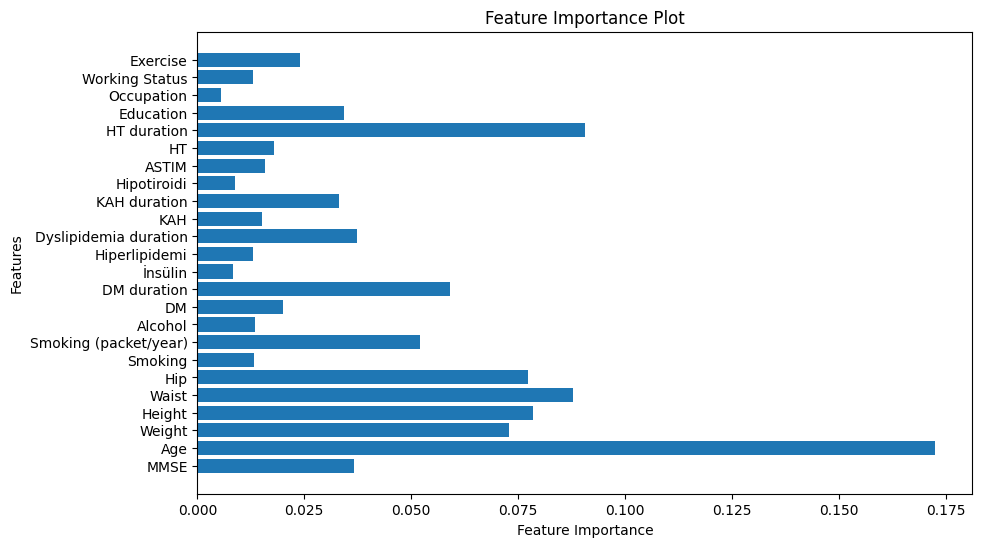

In [212]:
# Get feature importances
feature_importances = ensemble_model1M.named_estimators_['rf'].feature_importances_
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [213]:
# Select features
selected_features = [
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking',
       'Smoking (packet/year)', 'Alcohol', 'DM', 'DM duration', 'İnsülin', 'Hiperlipidemi', 'Dyslipidemia duration','KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM',
       'HT', 'HT duration','Education', 'Occupation', 'Working Status', 'Exercise']

# Selecting the features and target variable
X = df_women[selected_features]
y = df_women['SARCOPENIA']

# Create the SimpleImputer object with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the numerical columns with missing values
X_imputed = imputer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
lr_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create ensemble model
ensemble_model1F = VotingClassifier(estimators=[
    ('lr', lr_model),
    ('rf', rf_model),
    ('gb', gb_model)
], voting='soft')

# Train ensemble model
ensemble_model1F.fit(X_train_scaled, y_train)

# Predict using ensemble model
ensemble_pred = ensemble_model1F.predict(X_test_scaled)

probabilities = ensemble_model1F.predict_proba(X_test_scaled)[:, 1]
# Diagnose patients
threshold_high = 0.8  # Very high probability threshold
threshold_low = 0.2   # Very low probability threshold

predicted_sarcopenia = ['Positive' if prob >= threshold_high else 'Negative' if prob <= threshold_low else 'Further testing required' for prob in probabilities]

print(predicted_sarcopenia)

# Evaluate ensemble model
print("\nEnsemble Model:")
print(classification_report(y_test, ensemble_pred))
print("Accuracy:", accuracy_score(y_test, ensemble_pred))
print("Precision:", precision_score(y_test, ensemble_pred))
print("Recall:", recall_score(y_test, ensemble_pred))
print("F1-score:", f1_score(y_test, ensemble_pred))
print("ROC AUC:", roc_auc_score(y_test, ensemble_model1F.predict_proba(X_test_scaled)[:, 1]))

# Save the trained model
joblib.dump(ensemble_model1F, "ensemble_model1F.pkl",  protocol=4)




['Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Further testing required', 'Further testing required', 'Further testing required', 'Further testing required', 'Further testing required', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Further testing required', 'Negative', 'Further testing required', 'Negative', 'Furthe

['ensemble_model1F.pkl']

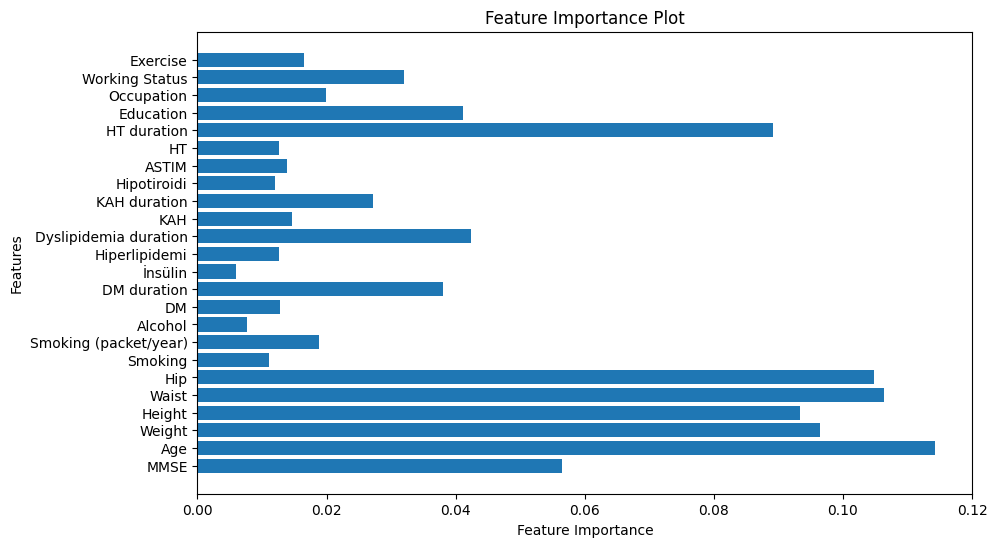

In [183]:

# Get feature importances
feature_importances = ensemble_model1F.named_estimators_['rf'].feature_importances_
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [184]:
# Select features
selected_features = [
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking',
       'Smoking (packet/year)', 'Alcohol', 'DM', 'DM duration', 'İnsülin', 'Hiperlipidemi', 'Dyslipidemia duration','KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM',
       'HT', 'HT duration','Education', 'Occupation', 'Working Status', 'Exercise','CST', 'LowCST', 'Gait speed']

# Selecting the features and target variable
X = df_men[selected_features]
y = df_men['SARCOPENIA']

# Create the SimpleImputer object with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the numerical columns with missing values
X_imputed = imputer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
lr_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create ensemble model
ensemble_model2M = VotingClassifier(estimators=[
    ('lr', lr_model),
    ('rf', rf_model),
    ('gb', gb_model)
], voting='soft')

# Train ensemble model
ensemble_model2M.fit(X_train_scaled, y_train)

# Predict using ensemble model
ensemble_pred = ensemble_model2M.predict(X_test_scaled)
probabilities = ensemble_model2M.predict_proba(X_test_scaled)[:, 1]
# Diagnose patients
threshold_high = 0.8  # Very high probability threshold
threshold_low = 0.2   # Very low probability threshold

predicted_sarcopenia = ['Positive' if prob >= threshold_high else 'Negative' if prob <= threshold_low else 'Further testing required' for prob in probabilities]

print(predicted_sarcopenia)

# Evaluate ensemble model
print("\nEnsemble Model:")
print(classification_report(y_test, ensemble_pred))
print("Accuracy:", accuracy_score(y_test, ensemble_pred))
print("Precision:", precision_score(y_test, ensemble_pred))
print("Recall:", recall_score(y_test, ensemble_pred))
print("F1-score:", f1_score(y_test, ensemble_pred))
print("ROC AUC:", roc_auc_score(y_test, ensemble_model2M.predict_proba(X_test_scaled)[:, 1]))

# Save the trained model
joblib.dump(ensemble_model2M, "ensemble_model2M.pkl",  protocol=4)


['Negative', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Further testing required', 'Further testing required', 'Negative', 'Further testing required', 'Further testing required', 'Negative', 'Further testing required', 'Further testing required', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Further testing required', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Further testing required', 'Negative', 'Further testing required', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative',

['ensemble_model2M.pkl']

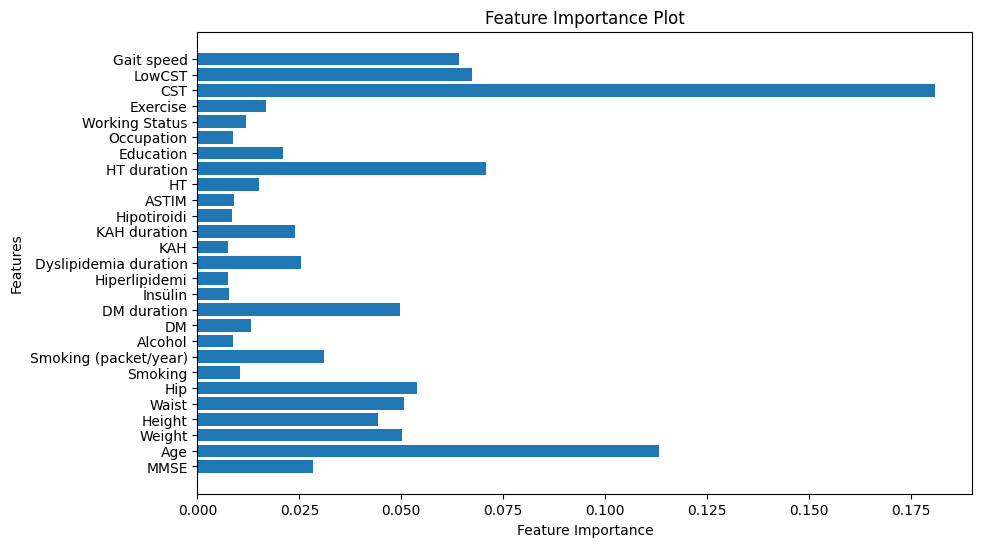

In [185]:
# Get feature importances
feature_importances = ensemble_model2M.named_estimators_['rf'].feature_importances_
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [186]:
# Select features
selected_features = [
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking',
       'Smoking (packet/year)', 'Alcohol', 'DM', 'DM duration', 'İnsülin', 'Hiperlipidemi', 'Dyslipidemia duration','KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM',
       'HT', 'HT duration','Education', 'Occupation', 'Working Status', 'Exercise','CST', 'LowCST', 'Gait speed']

# Selecting the features and target variable
X = df_men[selected_features]
y = df_men['SARCOPENIA']

# Create the SimpleImputer object with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the numerical columns with missing values
X_imputed = imputer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
lr_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create ensemble model
ensemble_model2F = VotingClassifier(estimators=[
    ('lr', lr_model),
    ('rf', rf_model),
    ('gb', gb_model)
], voting='soft')

# Train ensemble model
ensemble_model2F.fit(X_train_scaled, y_train)

# Predict using ensemble model
ensemble_pred = ensemble_model2F.predict(X_test_scaled)

probabilities = ensemble_model2F.predict_proba(X_test_scaled)[:, 1]
# Diagnose patients
threshold_high = 0.8  # Very high probability threshold
threshold_low = 0.2   # Very low probability threshold

predicted_sarcopenia = ['Positive' if prob >= threshold_high else 'Negative' if prob <= threshold_low else 'Further testing required' for prob in probabilities]

print(predicted_sarcopenia)

# Evaluate ensemble model
print("\nEnsemble Model:")
print(classification_report(y_test, ensemble_pred))
print("Accuracy:", accuracy_score(y_test, ensemble_pred))
print("Precision:", precision_score(y_test, ensemble_pred))
print("Recall:", recall_score(y_test, ensemble_pred))
print("F1-score:", f1_score(y_test, ensemble_pred))
print("ROC AUC:", roc_auc_score(y_test, ensemble_model2F.predict_proba(X_test_scaled)[:, 1]))

# Save the trained model
joblib.dump(ensemble_model2F, "ensemble_model2F.pkl",  protocol=4)

['Negative', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Further testing required', 'Further testing required', 'Negative', 'Further testing required', 'Further testing required', 'Negative', 'Further testing required', 'Further testing required', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Further testing required', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Further testing required', 'Negative', 'Further testing required', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative',

['ensemble_model2F.pkl']

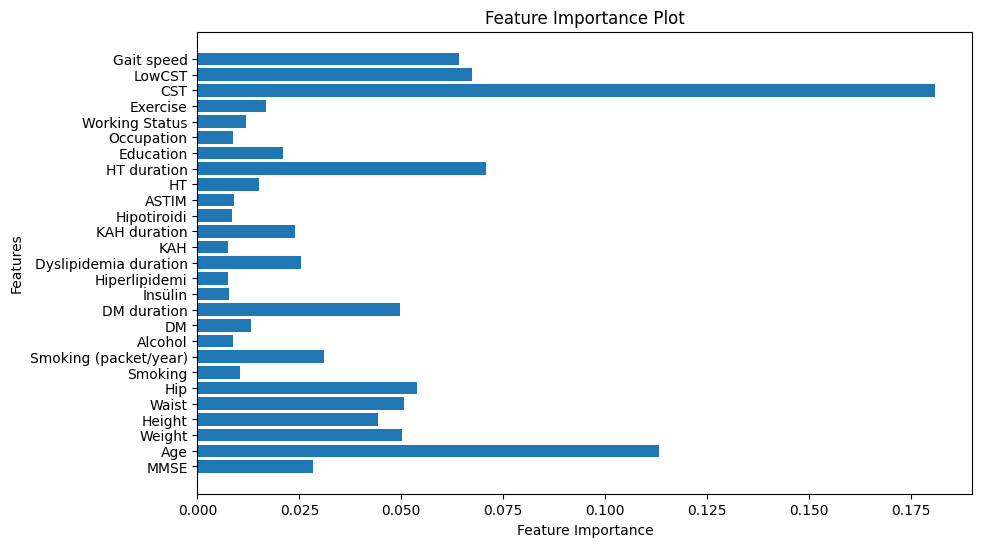

In [187]:
# Get feature importances
feature_importances = ensemble_model2F.named_estimators_['rf'].feature_importances_
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [188]:
# Select features
selected_features = [
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking',
       'Smoking (packet/year)', 'Alcohol', 'DM', 'DM duration', 'İnsülin', 'Hiperlipidemi', 'Dyslipidemia duration','KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM',
       'HT', 'HT duration','Education', 'Occupation', 'Working Status', 'Exercise','CST', 'LowCST', 'Gait speed',
    'Low grip strength', 'Grip strength']

# Selecting the features and target variable
X = df_women[selected_features]
y = df_women['SARCOPENIA']

# Create the SimpleImputer object with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the numerical columns with missing values
X_imputed = imputer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
lr_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create ensemble model
ensemble_model3M = VotingClassifier(estimators=[
    ('lr', lr_model),
    ('rf', rf_model),
    ('gb', gb_model)
], voting='soft')

# Train ensemble model
ensemble_model3M.fit(X_train_scaled, y_train)

# Predict using ensemble model
ensemble_pred = ensemble_model3M.predict(X_test_scaled)

probabilities = ensemble_model3M.predict_proba(X_test_scaled)[:, 1]
# Diagnose patients
threshold_high = 0.8  # Very high probability threshold
threshold_low = 0.2   # Very low probability threshold

predicted_sarcopenia = ['Positive' if prob >= threshold_high else 'Negative' if prob <= threshold_low else 'Further testing required' for prob in probabilities]

print(predicted_sarcopenia)

# Evaluate ensemble model
print("\nEnsemble Model:")
print(classification_report(y_test, ensemble_pred))
print("Accuracy:", accuracy_score(y_test, ensemble_pred))
print("Precision:", precision_score(y_test, ensemble_pred))
print("Recall:", recall_score(y_test, ensemble_pred))
print("F1-score:", f1_score(y_test, ensemble_pred))
print("ROC AUC:", roc_auc_score(y_test, ensemble_model3M.predict_proba(X_test_scaled)[:, 1]))

# Save the trained model
joblib.dump(ensemble_model3M, "ensemble_model3M.pkl",  protocol=4)

['Negative', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Positive', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Positive', 'Further testing required', 'Further testing required', 'Further testing required', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Negative', 'Positive', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Further testing required', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Further testing required', 'Negati

['ensemble_model3M.pkl']

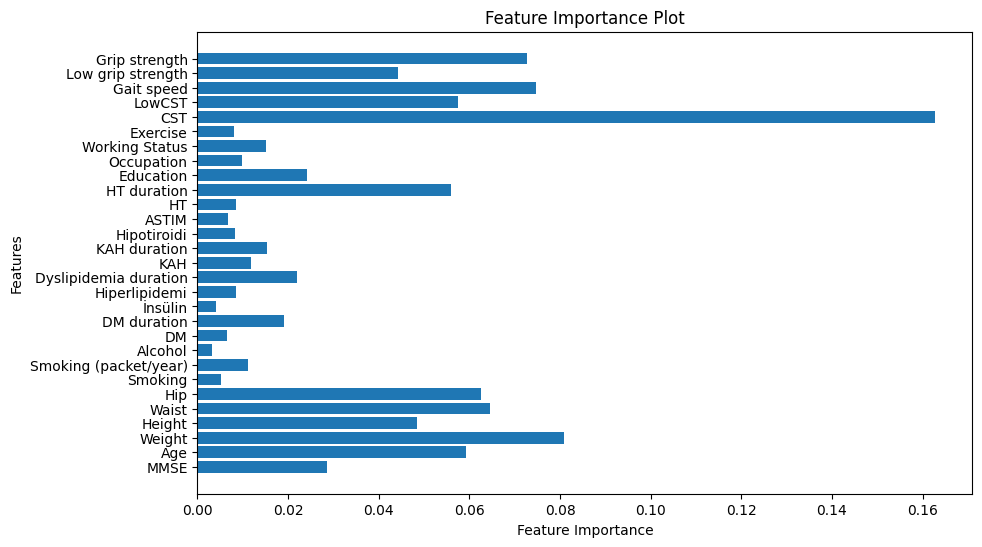

In [189]:
# Get feature importances
feature_importances = ensemble_model3M.named_estimators_['rf'].feature_importances_
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [190]:
# from google.colab import drive
# drive.mount('/content/drive')

In [191]:
# Select features
selected_features = [
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking',
       'Smoking (packet/year)', 'Alcohol', 'DM', 'DM duration', 'İnsülin', 'Hiperlipidemi', 'Dyslipidemia duration','KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM',
       'HT', 'HT duration','Education', 'Occupation', 'Working Status', 'Exercise','CST', 'LowCST', 'Gait speed',
    'Low grip strength', 'Grip strength']

# Selecting the features and target variable
X = df_women[selected_features]
y = df_women['SARCOPENIA']

# Create the SimpleImputer object with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the numerical columns with missing values
X_imputed = imputer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
lr_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create ensemble model
ensemble_model3F = VotingClassifier(estimators=[
    ('lr', lr_model),
    ('rf', rf_model),
    ('gb', gb_model)
], voting='soft')

# Train ensemble model
ensemble_model3F.fit(X_train_scaled, y_train)

# Predict using ensemble model
ensemble_pred = ensemble_model3F.predict(X_test_scaled)
probabilities = ensemble_model3F.predict_proba(X_test_scaled)[:, 1]
# Diagnose patients
threshold_high = 0.8  # Very high probability threshold
threshold_low = 0.2   # Very low probability threshold

predicted_sarcopenia = ['Positive' if prob >= threshold_high else 'Negative' if prob <= threshold_low else 'Further testing required' for prob in probabilities]

print(predicted_sarcopenia)

# Evaluate ensemble model
print("\nEnsemble Model:")
print(classification_report(y_test, ensemble_pred))
print("Accuracy:", accuracy_score(y_test, ensemble_pred))
print("Precision:", precision_score(y_test, ensemble_pred))
print("Recall:", recall_score(y_test, ensemble_pred))
print("F1-score:", f1_score(y_test, ensemble_pred))
print("ROC AUC:", roc_auc_score(y_test, ensemble_model3F.predict_proba(X_test_scaled)[:, 1]))

# Save the trained model
joblib.dump(ensemble_model3F, "ensemble_model3F.pkl",  protocol=4)


['Negative', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Positive', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Positive', 'Further testing required', 'Further testing required', 'Further testing required', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Negative', 'Positive', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Further testing required', 'Further testing required', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Negative', 'Further testing required', 'Negative', 'Negative', 'Further testing required', 'Negati

['ensemble_model3F.pkl']

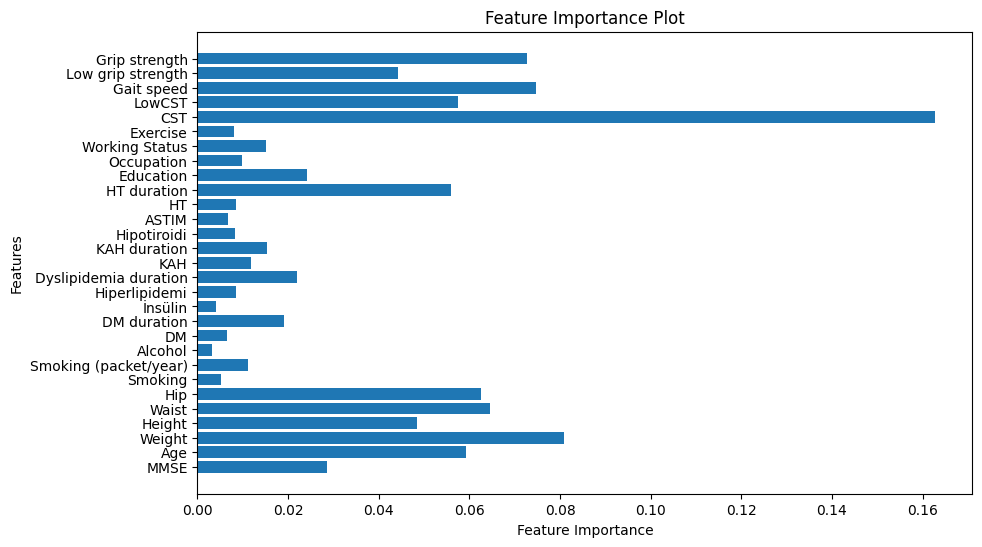

In [192]:
# Get feature importances
feature_importances = ensemble_model3F.named_estimators_['rf'].feature_importances_
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()